In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc 
sigma = sc.sigma
sigma

5.670367e-08

In [20]:
help(sc)

Help on package scipy.constants in scipy:

NAME
    scipy.constants

DESCRIPTION
    Constants (:mod:`scipy.constants`)
    
    .. currentmodule:: scipy.constants
    
    Physical and mathematical constants and units.
    
    
    Mathematical constants
    
    ================  =================================================================
    ``pi``            Pi
    ``golden``        Golden ratio
    ``golden_ratio``  Golden ratio
    ================  =================================================================
    
    
    Physical constants
    
    ===========================  =================================================================
    ``c``                        speed of light in vacuum
    ``speed_of_light``           speed of light in vacuum
    ``mu_0``                     the magnetic constant :math:`\mu_0`
    ``epsilon_0``                the electric constant (vacuum permittivity), :math:`\epsilon_0`
    ``h``                        the Planck cons

In [21]:
T = np.arange(0.,500.,1.)

In [22]:
def CtoK(C):
    return C + 273.15

In [23]:
T0 = CtoK(20)

In [24]:
def Pcorr(T,T0=300,eps=1,A=1):
    P = eps*sigma*A*(T**4 - T0**4)
    return P

In [25]:
def Papprox(T,T0=300,eps=1,A=1):
    P = 4*eps*sigma*A*T0**3*(T-T0)
    return P

In [32]:
P1 = Pcorr(T,T0,A=1)
P2 = Papprox(T,T0,A=1)
P0 = Pcorr(T0,T0)

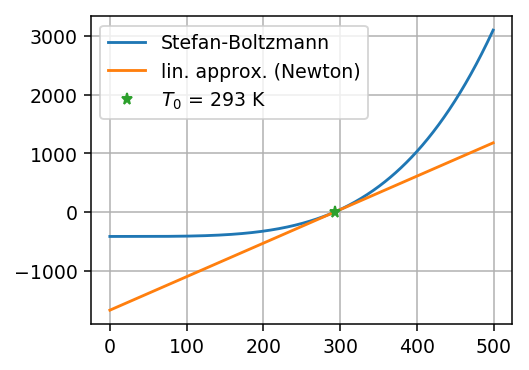

In [38]:
fig = plt.figure(figsize=(4,3), dpi = 136)
ax = fig.add_subplot(111)
ax.plot(T,P1,label="Stefan-Boltzmann")
ax.plot(T,P2, label="lin. approx. (Newton)")
ax.plot(T0,P0,"*", label="$T_0$ = %3.2f K" % (T0))
ax.legend()
ax.grid(True)
plt.show()

In [74]:
def JtoCal(J):
    cal = J/4.184
    return cal

In [75]:
def Days2Secs(d):
    return d*24*60*60

In [96]:
T = CtoK(33)
T0 = CtoK(30)
print(T, T0)

306.15 303.15


In [97]:
P1 = Pcorr(T, T0, A=1.4, eps=1)
P2 = Papprox(T, T0, A=1.4, eps=1)
print(("Power 1: {:.2f} W").format(P1))
print("Power 1: %.2f W" % P1)
print(("Power 2: {:.2f} W").format(P2))
print("Power 2: %.2f W" % P2)

Power 1: 26.94 W
Power 1: 26.94 W
Power 2: 26.54 W
Power 2: 26.54 W


In [98]:
t = Days2Secs(1)
Q1 =P1*t
Q2 =P2*t

In [99]:
print(("Energy loss per day: {:.2f} kJ").format(Q1/1000.))
print(("Energy loss per day: {:.2f} kJ").format(Q2/1000.))

Energy loss per day: 2327.28 kJ
Energy loss per day: 2293.02 kJ


In [100]:
Q1cal = JtoCal(Q1)
Q2cal = JtoCal(Q2)

In [101]:
print(("Energy loss per day (1): {:.2f} kcal").format(Q1cal/1000))
print(("Energy loss per day (2): {:.2f} kcal").format(Q2cal/1000))

Energy loss per day (1): 556.23 kcal
Energy loss per day (2): 548.04 kcal


In [102]:
err = (Q2cal - Q1cal)/Q1cal

In [103]:
err

-0.014722325892463157